In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as ss
import scipy.fftpack as sf
import scipy.constants as sc

补余距离徙动示例

0.9644493817991053


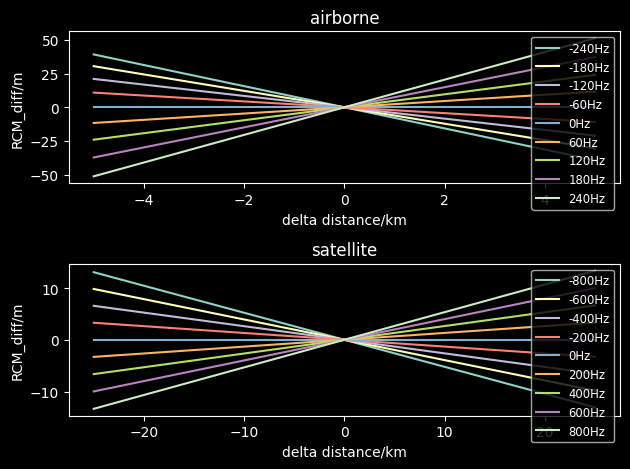

In [3]:
Vr_air = 150     #resume to be a constant
Vr_sate = 7100   #resume to be a constant
f0 = 5.3e+09
f_airborne = np.arange(-240,250,60)
f_ref_air = 1e+3
R_airborne = np.linspace(-5,5,100)*1e+3
R_ref_air = 500e+3
f_satellite = np.arange(-800,810,200)
f_ref_sate = 4e+4
R_satellite = np.linspace(-25,25,100)*1e+3
R_ref_sate = 2500e+3

D_fV_air = np.sqrt(1-sc.c**2*(f_ref_air+f_airborne)**2/4/Vr_air**2/f0**2).reshape(len(f_airborne),1)
D_fV_air_ref = np.sqrt(1-sc.c**2*f_ref_air**2/4/Vr_air**2/f0**2)

print(1-sc.c**2*f_ref_air**2/4/Vr_air**2/f0**2)
D_fV_sate = np.sqrt(1-sc.c**2*(f_ref_sate+f_satellite)**2/4/Vr_sate**2/f0**2).reshape(len(f_satellite),1)
D_fV_sate_ref = np.sqrt(1-sc.c**2*f_ref_sate**2/4/Vr_sate**2/f0**2)

# RCM_diff_air = (R_ref_air+R_airborne)*(1/D_fV_air - 1/D_fV_air_ref) - R_ref_air(1/D_fV_air- 1/D_fV_air_ref)
RCM_diff_air = R_airborne.reshape(1,100)*(1/D_fV_air - 1/D_fV_air_ref)
RCM_diff_sate = R_satellite.reshape(1,100)*(1/D_fV_sate - 1/D_fV_sate_ref)

plt.figure()
plt.subplot(2,1,1)
for i in range(len(f_airborne)):
    plt.plot(R_airborne*1e-3,RCM_diff_air[i,:],label = str(f_airborne[i])+'Hz')
plt.legend(fontsize = 'small')
plt.xlabel('delta distance/km')
plt.ylabel('RCM_diff/m')
plt.title('airborne')

plt.subplot(2,1,2)
for i in range(len(f_satellite)):
    plt.plot(R_satellite*1e-3,RCM_diff_sate[i,:],label = str(f_satellite[i])+'Hz')
plt.legend(fontsize = 'small')
plt.xlabel('delta distance/km')
plt.ylabel('RCM_diff/m')
plt.title('satellite')

plt.tight_layout()

